# Step 1 - Open the data file and study the general information
1. First we import libraries, open files and study the data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df_megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_megaline_tariffs = pd.read_csv('/datasets/megaline_tariffs.csv')
df_megaline_users = pd.read_csv('/datasets/megaline_users.csv')

In [3]:
print(df_megaline_calls.head())
print(df_megaline_calls.info())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [4]:
print(df_megaline_internet.head())
print(df_megaline_internet.info())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [5]:
print(df_megaline_messages.head())
print(df_megaline_messages.info())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [6]:
print(df_megaline_tariffs.head())
print(df_megaline_tariffs.info())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute tariff_name  
0               20          10             0.03            0.03        surf  
1               70           7             0.01            0.01    ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
tariff_name              2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [7]:
print(df_megaline_users.head())
print(df_megaline_users.info())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date    tariff churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-nul

The data is separated in five tables, all with same key 'user_id'. We will join them.
We need to deal with nulls, dates and data type, integers and strings, and check they are all possible data.
Dataframe df_megaline_tariffs is all set.

# Step 2 - Prepare the data

Correcting colums.

Table 1: df_megaline_calls = id, user_id, call_date, duration,  137735 entries

In [8]:
print(df_megaline_calls['id'].unique())
print(df_megaline_calls['id'].value_counts())

['1000_93' '1000_145' '1000_247' ... '1499_201' '1499_202' '1499_203']
1027_156     1
1228_95      1
1290_11      1
1316_10      1
1488_954     1
            ..
1041_233     1
1032_84      1
1300_179     1
1324_1208    1
1164_70      1
Name: id, Length: 137735, dtype: int64


In [9]:
print(df_megaline_calls['user_id'].unique())
print(df_megaline_calls['user_id'].value_counts())

[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1026 1027 1028
 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042
 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056
 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070
 1071 1072 1073 1074 1075 1076 1077 1078 1079 1081 1082 1083 1084 1085
 1086 1087 1088 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100
 1101 1102 1103 1104 1105 1106 1107 1109 1110 1111 1112 1113 1114 1115
 1116 1117 1118 1119 1120 1122 1123 1124 1125 1126 1127 1128 1130 1132
 1133 1134 1135 1136 1138 1139 1140 1141 1142 1144 1145 1146 1147 1148
 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162
 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176
 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190
 1191 1192 1193 1195 1196 1197 1198 1199 1200 1201 1202 1203 1205 1206
 1207 

In [10]:
print(df_megaline_calls['call_date'].unique())
df_megaline_calls['call_date']=pd.to_datetime(df_megaline_calls['call_date'], format='%Y-%m-%d')
df_megaline_calls['month'] = pd.DatetimeIndex(df_megaline_calls['call_date']).month
df_megaline_calls['year'] = pd.DatetimeIndex(df_megaline_calls['call_date']).year
df_megaline_calls['weekday'] = df_megaline_calls['call_date'].dt.weekday
print(df_megaline_calls['call_date'].value_counts())
print(df_megaline_calls['month'].value_counts())
print(df_megaline_calls['year'].value_counts())
print(df_megaline_calls['weekday'].value_counts())

['2018-12-27' '2018-12-28' '2018-12-30' '2018-12-31' '2018-12-26'
 '2018-12-29' '2018-09-06' '2018-10-12' '2018-10-17' '2018-12-05'
 '2018-12-13' '2018-12-04' '2018-11-17' '2018-11-19' '2018-11-09'
 '2018-12-24' '2018-11-15' '2018-09-21' '2018-10-27' '2018-10-28'
 '2018-09-30' '2018-11-03' '2018-11-25' '2018-12-21' '2018-12-07'
 '2018-08-28' '2018-12-01' '2018-11-08' '2018-09-14' '2018-11-23'
 '2018-10-24' '2018-12-11' '2018-12-16' '2018-12-19' '2018-12-20'
 '2018-12-10' '2018-09-17' '2018-11-24' '2018-10-14' '2018-10-04'
 '2018-10-31' '2018-10-07' '2018-09-24' '2018-10-16' '2018-10-21'
 '2018-11-14' '2018-08-17' '2018-09-15' '2018-11-06' '2018-11-30'
 '2018-08-16' '2018-09-16' '2018-12-02' '2018-09-07' '2018-09-28'
 '2018-11-11' '2018-09-22' '2018-10-03' '2018-11-04' '2018-10-30'
 '2018-08-23' '2018-10-23' '2018-11-10' '2018-08-24' '2018-09-05'
 '2018-08-18' '2018-09-18' '2018-08-14' '2018-08-21' '2018-11-26'
 '2018-12-08' '2018-09-03' '2018-11-18' '2018-08-27' '2018-11-29'
 '2018-11-

In [11]:
print(df_megaline_calls['duration'].unique())
print(df_megaline_calls['duration'].value_counts())

[ 8.52 13.66 14.48 ... 27.53 22.57 25.18]
0.00     26834
8.37       102
4.02       102
3.91       101
7.61       100
         ...  
25.53        1
29.34        1
26.05        1
36.24        1
27.16        1
Name: duration, Length: 2802, dtype: int64


Conclusions from first subtable: The ID datas are okay. The call date was turm to date-time and separated to year, month and week-day. Many calls have 0.0 duration (almost 1/5 from the rows), probably since calls were not answered or it is for Ipads. No nulls to deal with.

Table 2: df_megaline_internet = id, user_id, session_date, mb_used, 104825 entries

In [12]:
print(df_megaline_internet['id'].unique())
print(df_megaline_internet['id'].value_counts())

['1000_13' '1000_204' '1000_379' ... '1499_217' '1499_218' '1499_219']
1027_156    1
1440_269    1
1260_208    1
1065_19     1
1318_236    1
           ..
1348_333    1
1006_161    1
1123_340    1
1020_88     1
1164_70     1
Name: id, Length: 104825, dtype: int64


In [13]:
print(df_megaline_internet['user_id'].unique())
print(df_megaline_internet['user_id'].value_counts())

[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1026 1027 1028
 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042
 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056
 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070
 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084
 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098
 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112
 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126
 1127 1128 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141
 1142 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156
 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170
 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184
 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195 1196 1197 1198
 1199 

In [14]:
print(df_megaline_internet['session_date'].unique())
df_megaline_internet['session_date']=pd.to_datetime(df_megaline_internet['session_date'], format='%Y-%m-%d')
df_megaline_internet['month'] = pd.DatetimeIndex(df_megaline_internet['session_date']).month
df_megaline_internet['year'] = pd.DatetimeIndex(df_megaline_internet['session_date']).year
df_megaline_internet['weekday'] = df_megaline_internet['session_date'].dt.weekday
print(df_megaline_internet['session_date'].value_counts())
print(df_megaline_internet['month'].value_counts())
print(df_megaline_internet['year'].value_counts())
print(df_megaline_internet['weekday'].value_counts())

['2018-12-29' '2018-12-31' '2018-12-28' '2018-12-26' '2018-12-27'
 '2018-08-24' '2018-12-09' '2018-11-04' '2018-11-27' '2018-12-13'
 '2018-10-28' '2018-09-05' '2018-10-14' '2018-09-17' '2018-10-17'
 '2018-10-09' '2018-09-27' '2018-09-18' '2018-11-25' '2018-12-03'
 '2018-11-16' '2018-10-23' '2018-12-07' '2018-09-08' '2018-10-18'
 '2018-11-17' '2018-11-10' '2018-09-02' '2018-11-28' '2018-12-10'
 '2018-09-06' '2018-10-04' '2018-11-11' '2018-10-31' '2018-12-24'
 '2018-10-13' '2018-12-16' '2018-09-30' '2018-08-29' '2018-09-22'
 '2018-08-27' '2018-11-20' '2018-08-18' '2018-08-16' '2018-10-21'
 '2018-10-10' '2018-10-05' '2018-09-28' '2018-11-01' '2018-12-02'
 '2018-10-03' '2018-09-24' '2018-08-17' '2018-10-26' '2018-11-24'
 '2018-10-19' '2018-10-02' '2018-09-01' '2018-09-21' '2018-08-31'
 '2018-12-04' '2018-09-13' '2018-12-21' '2018-11-21' '2018-11-05'
 '2018-10-01' '2018-12-15' '2018-10-22' '2018-11-18' '2018-09-07'
 '2018-08-25' '2018-08-21' '2018-12-14' '2018-09-16' '2018-09-09'
 '2018-12-

In [15]:
print(df_megaline_internet['mb_used'].unique())
print(df_megaline_internet['mb_used'].value_counts())
df_megaline_internet['mb_used'] = df_megaline_internet['mb_used'].fillna(0.0)
print(df_megaline_internet['mb_used'].mean())
print(df_megaline_internet['mb_used'].max())
print(df_megaline_internet['mb_used'].min())

[ 89.86   0.   660.4  ... 753.43 304.72 758.31]
0.00      13747
414.46        8
435.77        8
417.46        7
313.79        7
          ...  
638.12        1
217.39        1
683.90        1
243.97        1
563.11        1
Name: mb_used, Length: 57624, dtype: int64
366.71370102551873
1693.47
0.0


'id' and 'user_id' seem okay. We change the date to date-time and separated to year, month and week-day. Aat 'mb_used' there are no null, and 0.0 variables may be reasonable since sometimes older people doesn't know how to use the internet.

Table 3: df_megaline_messages =  id, user_id, message_date, 76051 entries

In [16]:
print(df_megaline_messages['id'].unique())
print(df_megaline_messages['id'].value_counts())

['1000_125' '1000_160' '1000_223' ... '1497_547' '1497_558' '1497_613']
1465_271    1
1123_153    1
1298_2      1
1439_6      1
1381_5      1
           ..
1176_34     1
1335_506    1
1384_524    1
1103_52     1
1164_70     1
Name: id, Length: 76051, dtype: int64


In [17]:
print(df_megaline_messages['user_id'].unique())
print(df_megaline_messages['user_id'].value_counts())

[1000 1001 1002 1003 1004 1005 1006 1007 1008 1011 1013 1014 1015 1016
 1017 1018 1019 1020 1023 1026 1027 1028 1029 1030 1031 1032 1033 1034
 1035 1036 1037 1038 1039 1043 1044 1045 1046 1047 1051 1052 1053 1054
 1055 1056 1057 1058 1059 1060 1061 1062 1064 1065 1066 1067 1069 1070
 1072 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1086 1087 1088
 1089 1090 1091 1092 1093 1094 1095 1096 1098 1099 1100 1101 1102 1103
 1104 1105 1107 1110 1111 1112 1113 1114 1115 1116 1118 1119 1120 1121
 1122 1123 1124 1125 1126 1127 1128 1130 1131 1132 1133 1134 1136 1137
 1138 1139 1140 1141 1142 1144 1145 1146 1147 1148 1151 1154 1155 1159
 1160 1161 1162 1163 1164 1165 1167 1168 1169 1170 1172 1173 1174 1175
 1176 1177 1178 1179 1180 1181 1182 1183 1184 1186 1187 1188 1189 1190
 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201 1203 1204 1205
 1206 1207 1209 1211 1212 1213 1214 1215 1218 1219 1220 1221 1222 1223
 1224 1227 1228 1229 1230 1231 1232 1234 1235 1236 1237 1240 1241 1242
 1243 

In [18]:
print(df_megaline_messages['message_date'].unique())
df_megaline_messages['message_date']=pd.to_datetime(df_megaline_messages['message_date'], format='%Y-%m-%d')
df_megaline_messages['message_date']=pd.to_datetime(df_megaline_messages['message_date'], format='%Y-%m-%d')
df_megaline_messages['month'] = pd.DatetimeIndex(df_megaline_messages['message_date']).month
df_megaline_messages['year'] = pd.DatetimeIndex(df_megaline_messages['message_date']).year
df_megaline_messages['weekday'] = df_megaline_messages['message_date'].dt.weekday
print(df_megaline_messages['message_date'].value_counts())
print(df_megaline_messages['month'].value_counts())
print(df_megaline_messages['year'].value_counts())
print(df_megaline_messages['weekday'].value_counts())


['2018-12-27' '2018-12-31' '2018-12-26' '2018-12-29' '2018-12-30'
 '2018-12-28' '2018-12-25' '2018-11-14' '2018-08-17' '2018-12-05'
 '2018-11-28' '2018-10-23' '2018-09-01' '2018-11-18' '2018-12-11'
 '2018-10-01' '2018-09-13' '2018-08-23' '2018-10-10' '2018-12-14'
 '2018-09-11' '2018-10-09' '2018-09-18' '2018-09-06' '2018-08-19'
 '2018-12-17' '2018-12-23' '2018-11-08' '2018-10-18' '2018-09-20'
 '2018-12-06' '2018-08-22' '2018-09-19' '2018-10-21' '2018-12-10'
 '2018-10-19' '2018-09-10' '2018-09-28' '2018-11-25' '2018-10-30'
 '2018-10-12' '2018-08-24' '2018-10-31' '2018-08-15' '2018-08-31'
 '2018-08-29' '2018-09-17' '2018-10-11' '2018-11-03' '2018-11-13'
 '2018-09-09' '2018-10-06' '2018-09-02' '2018-10-26' '2018-11-15'
 '2018-10-29' '2018-11-10' '2018-12-21' '2018-09-25' '2018-12-07'
 '2018-12-20' '2018-09-27' '2018-10-17' '2018-10-16' '2018-08-30'
 '2018-10-13' '2018-11-19' '2018-10-28' '2018-10-25' '2018-10-20'
 '2018-10-14' '2018-12-13' '2018-12-02' '2018-11-30' '2018-09-23'
 '2018-08-

Again, 'id' and 'user_id' seem okay. We change the date to date-time at 'message_date' and separated to year, month and week-day.

Table 5: df_megaline_users = user_id, first_name, last_name, age, city, reg_date, tariff, churn_date, 500 entries

In [19]:
print(df_megaline_users['user_id'].unique())
print(df_megaline_users['user_id'].value_counts())

[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195
 1196 

In [20]:
print(df_megaline_users['first_name'].unique())
print(df_megaline_users['first_name'].value_counts())

['Anamaria' 'Mickey' 'Carlee' 'Reynaldo' 'Leonila' 'Livia' 'Jesusa'
 'Eusebio' 'Emely' 'Gerry' 'Wilber' 'Halina' 'Jonelle' 'Nicolas' 'Edmundo'
 'Beata' 'Jann' 'Boris' 'Dennis' 'Shizue' 'Rutha' 'Ricarda' 'Bo' 'Jack'
 'Yuki' 'Jess' 'Meggan' 'Georgeanna' 'Jefferey' 'Franklyn' 'Chase' 'Lane'
 'Delila' 'Latoyia' 'Jc' 'Jeff' 'Myron' 'Reena' 'Olympia' 'Flo' 'Paris'
 'Drucilla' 'Clementina' 'Carlos' 'Devora' 'Barney' 'Yuk' 'Linwood'
 'Loise' 'Jone' 'Rosario' 'Edmond' 'Piper' 'Denis' 'Patrick' 'Theo'
 'Reinaldo' 'Avril' 'Denisse' 'Maryam' 'Kristeen' 'Larhonda' 'Gerardo'
 'Sherlyn' 'Ariel' 'Robt' 'Marcel' 'Dino' 'Jacelyn' 'Isa' 'Seymour'
 'Grady' 'Particia' 'Salena' 'Ronny' 'Chau' 'Earnest' 'Brian' 'Neal'
 'Grayce' 'Dominic' 'Lyndia' 'Wiley' 'Ignacio' 'Adena' 'Lenard' 'Malena'
 'Brock' 'Taylor' 'Taren' 'Karima' 'Walter' 'Lilliam' 'Song' 'Deandre'
 'Collin' 'Shavon' 'Aaron' 'Sage' 'Marquitta' 'Moises' 'Thurman' 'Micheal'
 'Eddy' 'Porfirio' 'Anderson' 'Booker' 'Amal' 'Spencer' 'Esta' 'Yevette'
 'M

In [21]:
print(df_megaline_users['last_name'].unique())
print(df_megaline_users['last_name'].value_counts())

['Bauer' 'Wilkerson' 'Hoffman' 'Jenkins' 'Thompson' 'Shields' 'Bradford'
 'Welch' 'Little' 'Blair' 'Henry' 'Mcbride' 'Snider' 'Simon' 'Carpenter'
 'Salinas' 'Gates' 'Grimes' 'Landry' 'Bell' 'Booker' 'Snow' 'Delaney'
 'Tyson' 'Wilkinson' 'Hamilton' 'Cardenas' 'Rasmussen' 'Henson' 'Kane'
 'Martin' 'Dalton' 'Moran' 'Gentry' 'Cummings' 'Hodge' 'Velazquez' 'Hicks'
 'Santos' 'Lynn' 'Mclaughlin' 'Hinton' 'Galloway' 'Ortega' 'Hooper'
 'French' 'Terrell' 'Avery' 'Owen' 'Gibbs' 'Hopkins' 'Espinoza' 'Frost'
 'Mclean' 'Chandler' 'Sargent' 'Colon' 'Richardson' 'Valencia' 'Head'
 'Hartman' 'Ashley' 'Noel' 'Woods' 'Allen' 'Jimenez' 'Fry' 'Contreras'
 'Roy' 'Spence' 'Crawford' 'Fuller' 'Bates' 'Browning' 'Webster' 'Gray'
 'Mccall' 'Mcgee' 'Sears' 'Witt' 'Acevedo' 'Mckinney' 'Bennett' 'Macias'
 'Atkinson' 'Robertson' 'Kelley' 'Skinner' 'Oliver' 'Strickland' 'Hampton'
 'Petersen' 'Alvarado' 'Cline' 'Powell' 'Sims' 'Banks' 'Rowe' 'Conley'
 'Walton' 'Weeks' 'Stephens' 'Poole' 'Garrison' 'Cash' 'Cotton' 'H

In [22]:
print(df_megaline_users['age'].unique())
print(df_megaline_users['age'].value_counts())

[45 28 36 52 40 31 73 42 53 19 59 50 61 26 30 70 34 56 37 74 64 49 38 57
 22 67 20 32 72 58 25 23 55 47 27 33 18 41 60 46 66 29 69 35 51 48 44 65
 21 54 75 39 68 71 63 24 43 62]
18    15
61    14
27    14
70    14
69    14
20    13
28    13
33    12
30    12
65    11
52    11
67    11
39    11
47    11
51    11
29    10
34    10
26    10
36    10
42    10
45    10
49    10
75    10
53    10
64    10
46    10
23     9
60     9
66     9
56     9
19     8
44     8
21     8
59     8
57     7
22     7
41     7
38     7
25     7
48     7
50     6
24     6
71     6
55     6
63     6
31     6
54     6
37     6
40     6
74     6
35     6
58     5
73     5
32     4
62     4
72     4
43     3
68     2
Name: age, dtype: int64


In [23]:
print(df_megaline_users['city'].unique())
print(df_megaline_users['city'].value_counts())

['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN M

In [24]:
print(df_megaline_users['reg_date'].unique())
df_megaline_users['reg_date']=pd.to_datetime(df_megaline_users['reg_date'], format='%Y-%m-%d')
df_megaline_users['reg_month'] = pd.DatetimeIndex(df_megaline_users['reg_date']).month
df_megaline_users['reg_year'] = pd.DatetimeIndex(df_megaline_users['reg_date']).year
df_megaline_users['reg_weekday'] = df_megaline_users['reg_date'].dt.weekday
print(df_megaline_users['reg_date'].value_counts())
print(df_megaline_users['reg_month'].value_counts())
print(df_megaline_users['reg_year'].value_counts())
print(df_megaline_users['reg_weekday'].value_counts())

['2018-12-24' '2018-08-13' '2018-10-21' '2018-01-28' '2018-05-23'
 '2018-11-29' '2018-11-27' '2018-07-11' '2018-08-03' '2018-04-22'
 '2018-03-09' '2018-01-18' '2018-06-28' '2018-12-01' '2018-11-25'
 '2018-12-05' '2018-10-25' '2018-08-26' '2018-10-17' '2018-01-16'
 '2018-11-08' '2018-12-21' '2018-04-20' '2018-07-06' '2018-08-21'
 '2018-10-28' '2018-07-20' '2018-06-26' '2018-02-21' '2018-01-05'
 '2018-02-14' '2018-07-15' '2018-06-07' '2018-05-30' '2018-12-08'
 '2018-05-09' '2018-08-11' '2018-06-25' '2018-12-23' '2018-03-17'
 '2018-01-15' '2018-06-20' '2018-08-30' '2018-10-15' '2018-02-19'
 '2018-06-16' '2018-08-24' '2018-03-20' '2018-12-11' '2018-03-05'
 '2018-07-30' '2018-04-21' '2018-01-13' '2018-03-01' '2018-08-07'
 '2018-11-06' '2018-04-07' '2018-03-08' '2018-02-06' '2018-11-05'
 '2018-06-03' '2018-09-24' '2018-01-29' '2018-09-17' '2018-05-12'
 '2018-07-12' '2018-04-06' '2018-11-26' '2018-08-06' '2018-07-29'
 '2018-01-14' '2018-02-11' '2018-01-26' '2018-04-27' '2018-04-15'
 '2018-10-

In [25]:
print(df_megaline_users['tariff'].unique())
print(df_megaline_users['tariff'].value_counts())

['ultimate' 'surf']
surf        339
ultimate    161
Name: tariff, dtype: int64


In [26]:
print(df_megaline_users['churn_date'].unique())
df_megaline_users['churn_date']=pd.to_datetime(df_megaline_users['churn_date'], format='%Y-%m-%d')
df_megaline_users['month'] = pd.DatetimeIndex(df_megaline_users['churn_date']).month
df_megaline_users['year'] = pd.DatetimeIndex(df_megaline_users['churn_date']).year
df_megaline_users['weekday'] = df_megaline_users['churn_date'].dt.weekday
print(df_megaline_users['churn_date'].value_counts())
print(df_megaline_users['month'].value_counts())
print(df_megaline_users['year'].value_counts())
print(df_megaline_users['weekday'].value_counts())



[nan '2018-12-18' '2018-11-16' '2018-09-07' '2018-12-30' '2018-10-07'
 '2018-12-31' '2018-11-24' '2018-11-11' '2018-12-12' '2018-11-14'
 '2018-12-27' '2018-11-29' '2018-12-22' '2018-11-30' '2018-10-13'
 '2018-07-31' '2018-12-15' '2018-12-19' '2018-10-03' '2018-10-22'
 '2018-08-16' '2018-12-26' '2018-09-01' '2018-11-21' '2018-08-19'
 '2018-12-10' '2018-09-17' '2018-11-18' '2018-09-18']
2018-12-18    3
2018-12-31    2
2018-11-14    2
2018-12-19    2
2018-11-16    1
2018-10-03    1
2018-08-16    1
2018-12-15    1
2018-12-12    1
2018-11-11    1
2018-12-26    1
2018-09-07    1
2018-10-22    1
2018-09-18    1
2018-09-01    1
2018-12-10    1
2018-12-27    1
2018-11-30    1
2018-10-13    1
2018-11-24    1
2018-10-07    1
2018-12-22    1
2018-11-21    1
2018-11-18    1
2018-09-17    1
2018-07-31    1
2018-12-30    1
2018-11-29    1
2018-08-19    1
Name: churn_date, dtype: int64
12.0    14
11.0     9
10.0     4
9.0      4
8.0      2
7.0      1
Name: month, dtype: int64
2018.0    34
Name: year, 

'churn_date' & 'reg_date' were changed to date-time. all other parameters seem okay.

2.1 - The number of calls made and minutes spent per month for each user.

In [27]:
df_gb_megaline_calls = df_megaline_calls.groupby(['user_id','month']).agg({'duration':'sum','user_id':'count'})
df_gb_megaline_calls.columns = ['duration','total_calls']
# df_gb_megaline_calls = df_gb_megaline_calls.groupby(['user_id','month','duration','total_calls']).size()
print(df_gb_megaline_calls.head())

               duration  total_calls
user_id month                       
1000    12       116.83           16
1001    8        171.14           27
        9        297.69           49
        10       374.11           65
        11       404.59           64


2.2 - The number of SMS sent per month for each user.

In [28]:
df_gb_megaline_messages = df_megaline_messages.groupby(['user_id','month']).agg({'user_id':'count'}).rename(columns={'id':'month'})
df_gb_megaline_messages.columns = ['messages']
# df_gb_megaline_messages = df_gb_megaline_messages.groupby(['user_id','month','messages']).size()
print(df_gb_megaline_messages.head())

               messages
user_id month          
1000    12           11
1001    8            30
        9            44
        10           53
        11           36


2.3 - The amount of traffic used per month for each user.

In [29]:
df_gb_megaline_internet = df_megaline_internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).rename(columns={'id':'month'})
df_gb_megaline_internet.columns = ['mb_used']
# df_gb_megaline_internet = df_gb_megaline_internet.groupby(['user_id','month','mb_used']).size()
print(df_gb_megaline_internet.head())

                mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30


2.4 - The monthly profit from each of the users.

First we merge all tables

In [30]:
df_gb_megaline_cal = df_megaline_calls.groupby(['user_id','month']).agg({'duration':'sum'})
print(df_gb_megaline_cal.head())
user_plan = df_megaline_users[['user_id','tariff']]

               duration
user_id month          
1000    12       116.83
1001    8        171.14
        9        297.69
        10       374.11
        11       404.59


In [31]:
df_users_usage = pd.concat([df_gb_megaline_cal,df_gb_megaline_messages,df_gb_megaline_internet],axis=1).reset_index().merge(user_plan,on='user_id')
df_users_usage.columns = ['user_id','month','minutes','sms','traffic','tariff']

In [32]:
df_users_usage.head()

,user_id,month,minutes,sms,traffic,tariff
0,1000,12,116.83,11.0,1901.47,ultimate
1,1001,8,171.14,30.0,6919.15,surf
2,1001,9,297.69,44.0,13314.82,surf
3,1001,10,374.11,53.0,22330.49,surf
4,1001,11,404.59,36.0,18504.30,surf


In [33]:
df_users_usage.fillna(0, inplace=True)
print(df_users_usage.info())
print(df_users_usage.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
user_id    2293 non-null int64
month      2293 non-null int64
minutes    2293 non-null float64
sms        2293 non-null float64
traffic    2293 non-null float64
tariff     2293 non-null object
dtypes: float64(3), int64(2), object(1)
memory usage: 125.4+ KB
None
   user_id  month  minutes   sms   traffic    tariff
0     1000     12   116.83  11.0   1901.47  ultimate
1     1001      8   171.14  30.0   6919.15      surf
2     1001      9   297.69  44.0  13314.82      surf
3     1001     10   374.11  53.0  22330.49      surf
4     1001     11   404.59  36.0  18504.30      surf


In [34]:
# user_plan['tariff'] = user_plan['tariff'].astype(str)
# user_plan.info()

Second we will calculate for each user if he exceeded the plan usage

In [35]:
def calc_ex_min(df_users):
    minutes = df_users['minutes']
    tariff = df_users['tariff']    
    surf_minutes = 500    
    ultimate_minutes = 3000
    minu = 0
    
    if tariff == "surf":
        if minutes > surf_minutes:
            minu = minutes-surf_minutes
    else:
        if minutes > ultimate_minutes:
            minu = minutes-ultimate_minutes
    return np.ceil(minu)

In [36]:
def calc_ex_traff(df_users):
    traffic = df_users['traffic']
    tariff = df_users['tariff']    
    surf_traffic = 15*1000      #mega-bite
    ultimate_traffic = 30*1000  #mega-bite
    traf = 0
    
    if tariff == "surf":
        if traffic > surf_traffic:
            traf = traffic-surf_traffic
    else:
        if traffic > ultimate_traffic:
            traf = traffic-ultimate_traffic
    return np.ceil(traf)

In [37]:
def calc_ex_sms(df_users):
    messages = df_users['sms']
    tariff = df_users['tariff']    
    surf_message = 50    
    ultimate_message = 1000
    mess = 0
    
    if tariff == "surf":
        if messages > surf_message:
            mess = messages-surf_message
    else:
        if messages > ultimate_message:
            mess = messages-ultimate_message
    return np.ceil(mess)


In [38]:
df_users_usage['exceeding_minutes'] = df_users_usage.apply(calc_ex_min,axis=1)
df_users_usage['exceeding_traffic'] = df_users_usage.apply(calc_ex_traff,axis=1)
df_users_usage['exceeding_sms'] = df_users_usage.apply(calc_ex_sms,axis=1)
print(df_users_usage.head())

   user_id  month  minutes   sms   traffic    tariff  exceeding_minutes  \
0     1000     12   116.83  11.0   1901.47  ultimate                0.0   
1     1001      8   171.14  30.0   6919.15      surf                0.0   
2     1001      9   297.69  44.0  13314.82      surf                0.0   
3     1001     10   374.11  53.0  22330.49      surf                0.0   
4     1001     11   404.59  36.0  18504.30      surf                0.0   

   exceeding_traffic  exceeding_sms  
0                0.0            0.0  
1                0.0            0.0  
2                0.0            0.0  
3             7331.0            3.0  
4             3505.0            0.0  


In [39]:
def calc_monthly_profit(df_usage):
    minutes = df_usage['exceeding_minutes']
    traffic = df_usage['exceeding_traffic']
    sms = df_usage['exceeding_sms']
    tariff = df_usage['tariff']
    
    surf_monthly = 20
    surf_minutes = 0.03  
    surf_traffic = 10         # in GB
    surf_message = 0.03
        
    ultimate_monthly = 70
    ultimate_minutes = 0.01
    ultimate_traffic = 7      # in GB
    ultimate_message = 0.01
    
    cur_sum = 0
    if tariff == 'surf':
        cur_sum = cur_sum + surf_monthly
        cur_sum = cur_sum + (surf_message*sms)
        cur_sum = cur_sum + (surf_traffic*(traffic/1000))
        cur_sum = cur_sum + (surf_minutes*minutes)
    else:
        cur_sum = cur_sum + ultimate_monthly
        cur_sum = cur_sum + (ultimate_message*sms)
        cur_sum = cur_sum + (ultimate_traffic*(traffic/1000))
        cur_sum = cur_sum + (ultimate_minutes * minutes)
    return cur_sum

In [40]:
df_users_usage['profit'] = df_users_usage.apply(calc_monthly_profit,axis=1)
df_rev_per_month = df_users_usage[['user_id','month','profit']]
df_rev_per_month.head()

,user_id,month,profit
0,1000,12,70.00
1,1001,8,20.00
2,1001,9,20.00
3,1001,10,93.40
4,1001,11,55.05


# Step 3 - Analyse the data

3.1 - Describe the clients' behavior. For the users of each of the plans, find the number of minutes and SMS and the volume of web traffic they require per month.

In [41]:
df_tariff_users_usage = df_users_usage.groupby(['tariff','month']).agg({'minutes':'sum','sms':'sum','traffic':'sum'})
df_tariff_users_usage.head()

minutes     sms     traffic
tariff month                              
surf   1        385.68    21.0     9749.72
       2       2527.66   108.0   109609.59
       3       7152.31   351.0   306945.12
       4      16619.00   870.0   599210.15
       5      29033.10  1849.0  1073099.33

3.2 - Calculate the mean, dispersion and standard deviation. Plot histograms. Describe the distributions.

First, we will separate the data by tariff.

In [42]:
df_surf_users_usage = df_users_usage.query('tariff == "surf"')[['user_id','minutes','traffic','sms']].reset_index()
df_ultimate_users_usage = df_users_usage.query('tariff == "ultimate"')[['user_id','minutes','traffic','sms']].reset_index()
df_surf_users_usage.head()
df_ultimate_users_usage.head()

,index,user_id,minutes,traffic,sms
0,0,1000,116.83,1901.47,11.0
1,19,1006,9.32,2068.37,15.0
2,20,1006,54.79,32118.82,139.0
3,26,1008,450.21,17106.99,21.0
4,27,1008,422.81,23676.72,37.0


In [43]:
surf_minutes_mean = np.mean(df_surf_users_usage['minutes'])
surf_minutes_std = np.std(df_surf_users_usage['minutes'])
surf_traffic_mean = np.mean(df_surf_users_usage['traffic'])
surf_traffic_std = np.std(df_surf_users_usage['traffic'])
surf_sms_mean = np.mean(df_surf_users_usage['sms'])
surf_sms_std = np.std(df_surf_users_usage['sms'])
print('The mean of minutes "surf" users talk per month is: {:.2f}, and the standart deviasion is: {:.2f}'.format(surf_minutes_mean,surf_minutes_std))
print('The mean of volume of web traffic "surf" users use per month is: {:.2f}, and the standart deviasion is: {:.2f}'.format(surf_traffic_mean,surf_traffic_std))
print('The mean of SMS "surf" users sent per month is: {:.2f}, and the standart deviasion is: {:.2f}'.format(surf_sms_mean,surf_sms_std))

The mean of minutes "surf" users talk per month is: 404.76, and the standart deviasion is: 221.59
The mean of volume of web traffic "surf" users use per month is: 16558.28, and the standart deviasion is: 8010.97
The mean of SMS "surf" users sent per month is: 31.16, and the standart deviasion is: 33.56


For ultimate information:

In [44]:
ultimate_minutes_mean = np.mean(df_ultimate_users_usage['minutes'])
ultimate_minutes_std = np.std(df_ultimate_users_usage['minutes'])
ultimate_traffic_mean = np.mean(df_ultimate_users_usage['traffic'])
ultimate_traffic_std = np.std(df_ultimate_users_usage['traffic'])
ultimate_sms_mean = np.mean(df_ultimate_users_usage['sms'])
ultimate_sms_std = np.std(df_ultimate_users_usage['sms'])
print('The mean of minutes "ultimate" users talk per month is: {:.2f}, and the standart deviasion is: {:.2f}'.format(ultimate_minutes_mean,ultimate_minutes_std))
print('The mean of volume of web traffic "ultimate" users use per month is: {:.2f}, and the standart deviasion is: {:.2f}'.format(ultimate_traffic_mean,ultimate_traffic_std))
print('The mean of SMS "ultimate" users sent per month is: {:.2f}, and the standart deviasion is: {:.2f}'.format(ultimate_sms_mean,ultimate_sms_std))

The mean of minutes "ultimate" users talk per month is: 406.19, and the standart deviasion is: 227.09
The mean of volume of web traffic "ultimate" users use per month is: 17214.70, and the standart deviasion is: 7846.44
The mean of SMS "ultimate" users sent per month is: 37.55, and the standart deviasion is: 34.74


## Conclusion
Both users kind have very near use, no matter their plan. The std. is high in comparision to the mean in each group, meaning that the customers are very extremate one of each other.
Surf users only exceed in average there web monthly package amount... but sms, and call minutes are in average underneeth the upper bound, while Ultimate users do not exceed any theme and they even don't get almost to the upper-bound.

3.3 - Plot histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18a3488b50>]],
      dtype=object)

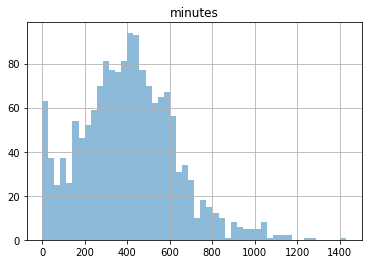

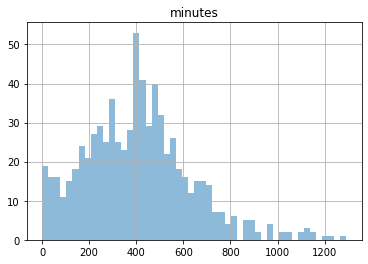

In [45]:
df_surf_users_usage.hist(column='minutes', bins=50, alpha=0.5) 
df_ultimate_users_usage.hist(column='minutes', bins=50, alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18a2d07690>]],
      dtype=object)

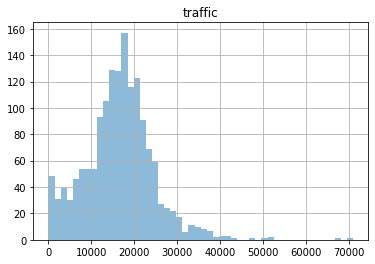

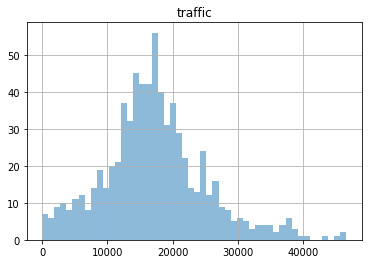

In [46]:
df_surf_users_usage.hist(column='traffic', bins=50, alpha=0.5) 
df_ultimate_users_usage.hist(column='traffic', bins=50, alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18a1d821d0>]],
      dtype=object)

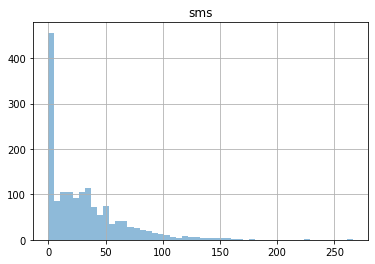

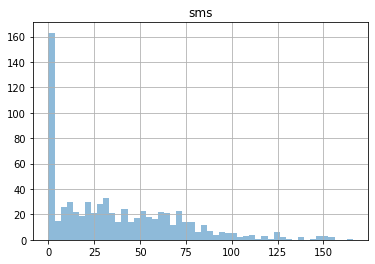

In [47]:
df_surf_users_usage.hist(column='sms', bins=50, alpha=0.5) 
df_ultimate_users_usage.hist(column='sms', bins=50, alpha=0.5)

## Conclusion
As we said before, both users kind have very near use density, no matter their plan. The parameter with bigger diferention is the sms, where the ultimate users use a little bit more.

3.4 - Describe the distributions

Where the distribution of the minutes and traffic use seem to have a normal distributin, the sms distribution is more as from the union distribution.

# Step 4 - Test the hypotheses

4.1 - the average profit from the users of Ultimate and Surf calling plans is different.

In [48]:
profit_surf = df_users_usage.groupby(['tariff'])['profit'].get_group('surf')
profit_ultimate = df_users_usage.groupby(['tariff'])['profit'].get_group('ultimate')

print('The mean profit of "surf" users is: {:.2f} dollars.'.format(profit_surf.mean()))
print('The mean profit of "ultimate" users is: {:.2f} dollars.'.format(profit_ultimate.mean()))

The mean profit of "surf" users is: 60.28 dollars.
The mean profit of "ultimate" users is: 72.47 dollars.


In [49]:
alpha = 0.05

results = st.ttest_ind(
        profit_surf, 
        profit_ultimate)
print('p-value:', results.pvalue)

if (results.pvalue<alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 8.516008745996602e-09
We reject the null hypothesis


## Conclusion
Ultimate users pay more in average than surf users, and we can reject the null hypothesis by alpha 0.05 and more (8.516e-09). By the histograms we saw before, users use the same amount of minutes, traffic and messages capacity. 'ultimate' users pay more since their plan is more expensive, but most of them does not use the extra capacity they get.

4.2 - The average profit from the users in NY-NJ area is different from that of the users from other regions.

In [50]:
df_ny_nj_users = df_megaline_users['city'].apply(lambda x: True if 'NY-NJ' in x else False)
list_ny_nj_users = df_megaline_users[df_ny_nj_users]['user_id'].values.tolist()
profit_ny_nj = df_users_usage[df_users_usage['user_id'].isin(list_ny_nj_users)]['profit']
profit_all_others = df_users_usage[~df_users_usage['user_id'].isin(list_ny_nj_users)]['profit']

In [51]:
print('The mean profit of NY-NJ area users is: {:.2f} dollars.'.format(profit_ny_nj.mean()))
print('The mean profit of all other users is: {:.2f} dollars.'.format(profit_all_others.mean()))

The mean profit of NY-NJ area users is: 59.77 dollars.
The mean profit of all other users is: 64.96 dollars.


In [52]:
alpha = 0.05

results = st.ttest_ind(
        profit_ny_nj, 
        profit_all_others)
print('p-value:', results.pvalue)

if (results.pvalue<alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 0.05115458579605512
We can't reject the null hypothesis


## Conclusion
NY-NJ users pay less in average than all other users. They may be smarter and check which plan is better for them and pay less.
By t-test with alpha 0.5 we can't say we can reject the null hypothesis, but the p-value is so close, we can almost say is almost rejectable.

# Step 5 - Overall conclusion
After recieving 5 different tables, we merged them to take out overall information. The tables needed some refactor of columns specialy with dates.

After merging the tables, group by plan, users_id and month, we found out that 'ultimate' users pay more than the 'surf' users, even if they use almost the same capacity of sms, call minutes and internet traffic. We could understand this from plots and histograms we made.

Surf users only exceed in average there web monthly package amount... but sms, and call minutes are in average underneath the upper bound. Ultimate users do not exceed any theme and they even don't get almost to the upper-bound and their plan is over estimated and more expensive using it as normal people.

At the ende, we compeared between the profit from Surf users and Ultimate user. We saw that by confidence level of alpha = 8.516e-09 we could say that Surf users pay less than Ultimate users.
When compearing NY-NJ users and all the rest, we could almost say there is a difference between the profit from NY-NJ users, where NY-NJ users pay less. By alpha 0.05 we could not reject the null hyphotesis, but by 0.051 we could.
